In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
try:
    data = pd.read_excel("StressLevelDataset.xlsx")
except FileNotFoundError:
    print("❌ File 'StressLevelDataset.xlsx' tidak ditemukan. Pastik an file berada di folder yang sama.")
    raise SystemExit

print("===== Informasi Dataset Asli =====")
print(data.info())
print("\n===== 5 Data Teratas =====")
print(data.head())

===== Informasi Dataset Asli =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13

In [10]:
data.to_excel("StressLevelDataSet.xlsx", index=False)
print("\n💾 File dataset asli disimpan sebagai: StressLevelDataset.xlsx")


💾 File dataset asli disimpan sebagai: StressLevelDataset.xlsx


In [11]:
data_dirty = data.copy()

In [ ]:
for col in data_dirty.columns:
    missing_idx = data_dirty.sample(frac=0.05, random_state=42).index
    data_dirty.loc[missing_idx, col] = np.nan


Cek Missing Values:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [13]:
num_cols = data_dirty.select_dtypes(include=[np.number]).columns
if len(num_cols) > 0:
    for col in num_cols:
        outlier_idx = np.random.choice(data_dirty.index, size=min(3, len(data_dirty)), replace=False)
        data_dirty.loc[outlier_idx, col] = data_dirty[col].mean() + data_dirty[col].std() * 10

print("\n===== DATA SETELAH DIKOTORI =====")
print(data_dirty.head())


===== DATA SETELAH DIKOTORI =====
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           14.0         20.0                    0.0        11.0       2.0   
1           15.0          8.0                    1.0        15.0       5.0   
2           12.0         18.0                    1.0        14.0       2.0   
3           16.0         12.0                    1.0        15.0       4.0   
4           16.0         28.0                    0.0         7.0       2.0   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             1.0            2.0                4.0          2.0   
1             3.0            1.0                4.0          3.0   
2             1.0            2.0                2.0          2.0   
3             3.0            1.0                3.0          4.0   
4             3.0            5.0                1.0          3.0   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0          

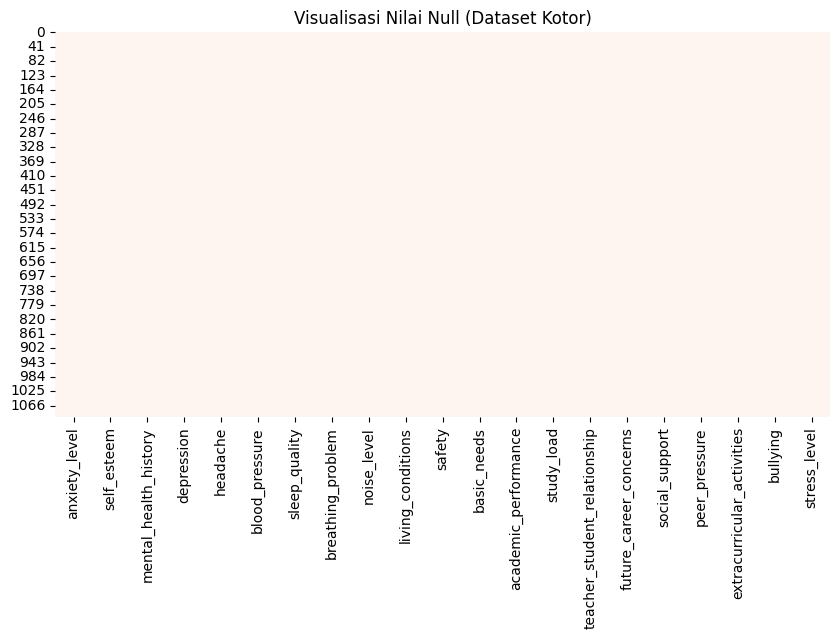

In [22]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_dirty.isnull(), cbar=False, cmap="Reds")
plt.title("Visualisasi Nilai Null (Dataset Kotor)")
plt.show()

In [14]:
data_dirty.to_excel("data_kotor.xlsx", index=False)
print("\n💾 File dataset kotor disimpan sebagai: data_kotor.xlsx")


💾 File dataset kotor disimpan sebagai: data_kotor.xlsx


In [15]:
data_clean = data_dirty.copy()

In [16]:
data_clean.fillna(data_clean.mean(numeric_only=True), inplace=True)
for col in data_clean.select_dtypes(include=["object"]).columns:
    data_clean[col].fillna(data_clean[col].mode()[0], inplace=True)

print("\n===== Cek Ulang Missing Value Setelah Pembersihan =====")
print(data_clean.isnull().sum())


===== Cek Ulang Missing Value Setelah Pembersihan =====
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [17]:
if len(num_cols) > 0:
    for col in num_cols:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        data_clean[col] = np.where(
            (data_clean[col] < batas_bawah) | (data_clean[col] > batas_atas),
            data_clean[col].median(),
            data_clean[col]
        )

print("\n===== Data Setelah Outlier Diperbaiki =====")
print(data_clean.head())


===== Data Setelah Outlier Diperbaiki =====
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           14.0         20.0                    0.0        11.0       2.0   
1           15.0          8.0                    1.0        15.0       5.0   
2           12.0         18.0                    1.0        14.0       2.0   
3           16.0         12.0                    1.0        15.0       4.0   
4           16.0         28.0                    0.0         7.0       2.0   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             1.0            2.0                4.0          2.0   
1             3.0            1.0                4.0          3.0   
2             1.0            2.0                2.0          2.0   
3             3.0            1.0                3.0          4.0   
4             3.0            5.0                1.0          3.0   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0

In [18]:
le = LabelEncoder()
for col in data_clean.select_dtypes(include=["object"]).columns:
    try:
        data_clean[col] = le.fit_transform(data_clean[col])
    except Exception:
        print(f"⚠ Kolom {col} tidak bisa di-encode, dilewati.")

In [19]:
num_cols = data_clean.select_dtypes(include=[np.number]).columns
if len(num_cols) > 0:
    scaler = StandardScaler()
    data_clean[num_cols] = scaler.fit_transform(data_clean[num_cols])

print("\n===== Data Setelah Label Encoding & Normalisasi =====")
print(data_clean.head())


===== Data Setelah Label Encoding & Normalisasi =====
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0       0.484809     0.248640              -0.976636   -0.201208 -0.363349   
1       0.648949    -1.096462               1.023922    0.317126  1.770193   
2       0.156530     0.024456               1.023922    0.187543 -0.363349   
3       0.813089    -0.648095               1.023922    0.317126  1.059012   
4       0.813089     1.145375              -0.976636   -0.719541 -0.363349   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0       -1.419779      -0.427909           0.888730    -0.496538   
1        0.984774      -1.076257           0.888730     0.259960   
2       -1.419779      -0.427909          -0.542607    -0.496538   
3        0.984774      -1.076257           0.173062     1.016458   
4        0.984774       1.517133          -1.258275     0.259960   

   living_conditions  ...  basic_needs  academic_performance  study

In [20]:
if not data_clean.empty:
    data_clean.to_excel("data_bersih.xlsx", index=False)
    print("\n💾 File dataset bersih akhir disimpan sebagai: data_bersih.xlsx")
else:
    print("❌ Data bersih kosong! Periksa kembali langkah sebelumnya.")


💾 File dataset bersih akhir disimpan sebagai: data_bersih.xlsx



===== Statistik Deskriptif =====
       anxiety_level   self_esteem  mental_health_history    depression  \
count   1.100000e+03  1.100000e+03           1.100000e+03  1.100000e+03   
mean   -6.782453e-17  5.813531e-17           3.229740e-17 -8.074349e-18   
std     1.000455e+00  1.000455e+00           1.000455e+00  1.000455e+00   
min    -1.813148e+00 -1.993197e+00          -9.766365e-01 -1.626625e+00   
25%    -8.283091e-01 -7.601867e-01          -9.766365e-01 -8.491247e-01   
50%    -7.610118e-03  1.365483e-01          -9.766365e-01 -7.162428e-02   
75%     8.130889e-01  9.211914e-01           1.023922e+00  8.354595e-01   
max     1.633788e+00  1.369559e+00           1.023922e+00  1.872127e+00   

           headache  blood_pressure  sleep_quality  breathing_problem  \
count  1.100000e+03    1.100000e+03   1.100000e+03       1.100000e+03   
mean   1.243450e-16   -2.519197e-16  -8.074349e-17      -1.186929e-16   
std    1.000455e+00    1.000455e+00   1.000455e+00       1.000455e+00  

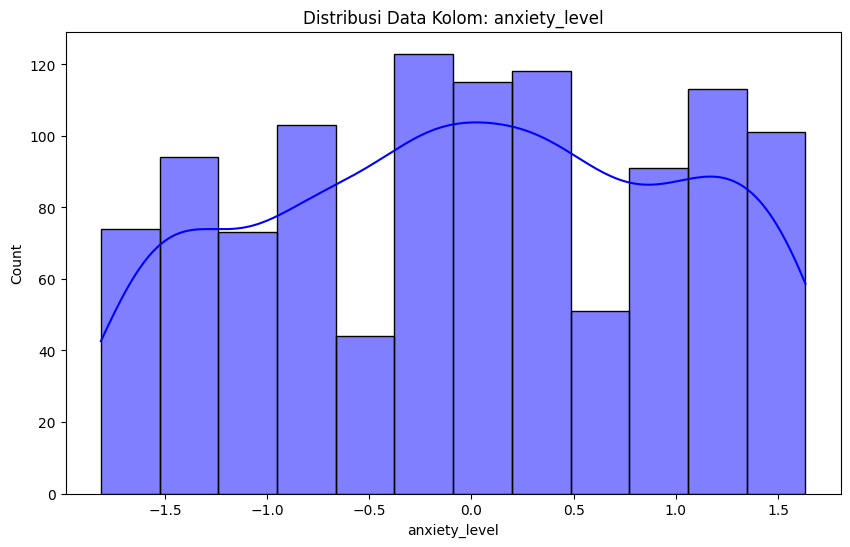


✅ Semua tahap preprocessing selesai!
   - File Asli  : StressLevelDataset.xlsx
   - File Kotor : data_kotor.xlsx
   - File Bersih: data_bersih.xlsx


In [21]:
if not data_clean.empty:
    print("\n===== Statistik Deskriptif =====")
    print(data_clean.describe())

    if len(num_cols) > 0:
        plt.figure(figsize=(10, 6))
        sns.histplot(data_clean[num_cols[0]], kde=True, color="blue")
        plt.title(f"Distribusi Data Kolom: {num_cols[0]}")
        plt.show()

print("\n✅ Semua tahap preprocessing selesai!")
print("   - File Asli  : StressLevelDataset.xlsx")
print("   - File Kotor : data_kotor.xlsx")
print("   - File Bersih: data_bersih.xlsx")